# Decision Tree Regressor

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

## Daten

In [3]:
x = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
y = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

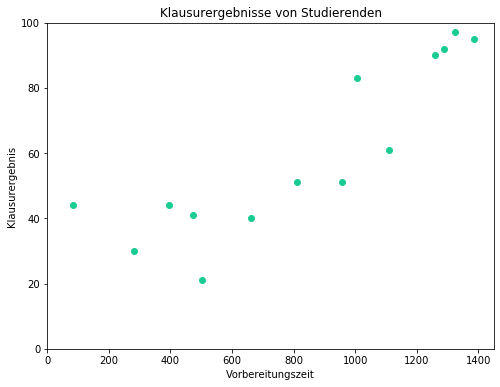

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,c="#1ACC94")
plt.title("Klausurergebnisse von Studierenden")
plt.ylabel("Klausurergebnis")
plt.xlabel("Vorbereitungszeit")
plt.xlim(0,1450)
plt.ylim(0,100)
plt.show()

## Beliebige Schnittstelle und Ermittlung der Standardabweichung

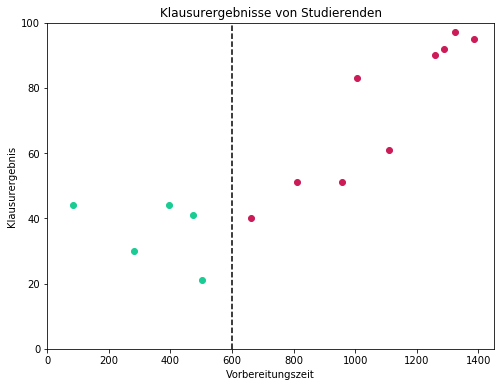

Standardabweichung Linke Seite: 9.10
Standardabweichung Rechte Seite: 21.11


In [5]:
cut = 600

plt.figure(figsize=(8,6))
plt.vlines(cut,0,100,ls="--")
plt.scatter(x[np.where(x<cut)],y[np.where(x<cut)],c="#1ACC94")
plt.scatter(x[np.where(x>=cut)],y[np.where(x>=cut)],c="#CC1B58")
plt.title("Klausurergebnisse von Studierenden")
plt.ylabel("Klausurergebnis")
plt.xlabel("Vorbereitungszeit")
plt.xlim(0,1450)
plt.ylim(0,100)
plt.show()

print("Standardabweichung Linke Seite: {:.2f}".format(np.std(y[np.where(x<cut)])))
print("Standardabweichung Rechte Seite: {:.2f}".format(np.std(y[np.where(x>=cut)])))

## Punkt zum Trennen finden, der Standardabweichung gewichtet mit Seitengröße minimiert

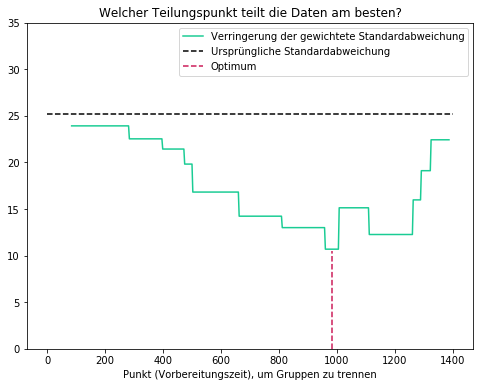

In [37]:
std_lifts = []
overall_std = np.std(y)
test_points = np.linspace(0,1400,500)

for i in test_points:
    left = np.std(y[np.where(x<i)])
    right = np.std(y[np.where(x>=i)])
    left_size = len(x[np.where(x<i)])/len(x)
    
    std_lifts.append((left*left_size+right*(1-left_size)))

plt.figure(figsize=(8,6))
plt.plot(test_points, std_lifts,label="Verringerung der gewichtete Standardabweichung",c="#1ACC94")
plt.hlines(overall_std,0,1400,ls="--",label="Ursprüngliche Standardabweichung")
plt.vlines(981,0,10.5,ls="--",label="Optimum",color="#CC1B58")
plt.title("Welcher Teilungspunkt teilt die Daten am besten?")
plt.xlabel("Punkt (Vorbereitungszeit), um Gruppen zu trennen")
plt.ylim(0,35)
plt.legend()
plt.show()

## Vergleich von Modellen mit verschiedener Tiefe

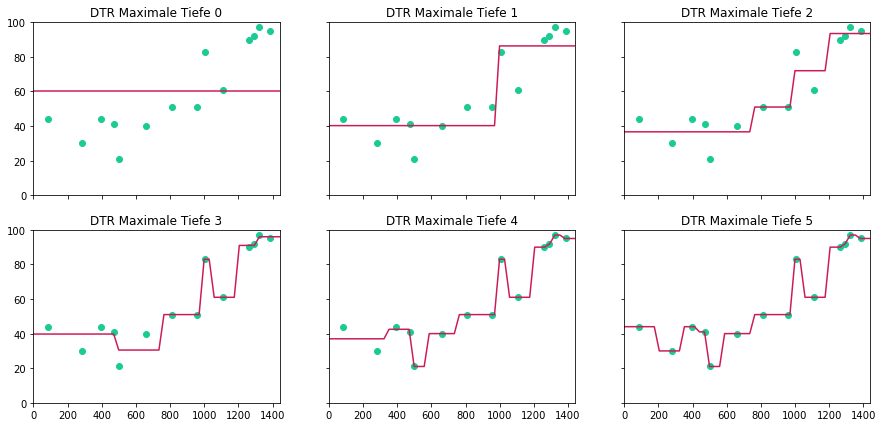

In [7]:
fig, axes = plt.subplots(2,3,figsize=(15,7),sharex=True,sharey=True)

for depth, axis in enumerate(axes.ravel()):

    if depth == 0:
        axis.hlines(np.mean(y),0,1440,color="#CC1B58")
    else:
        dtr = DecisionTreeRegressor(max_depth=depth)
        dtr.fit(x.reshape(-1, 1),y)
        axis.plot(np.linspace(0,1440),dtr.predict(np.linspace(0,1440).reshape(-1, 1)),c="#CC1B58")
        
    axis.scatter(x,y,c="#1ACC94")
    axis.set_ylim(0,100)
    axis.set_xlim(0,1440)
    axis.set_title("DTR Maximale Tiefe {}".format(depth))
plt.show()